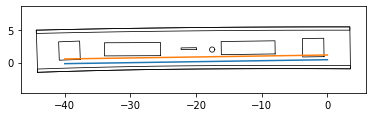

In [1]:
from ipynb.fs.full.whole_df import get_uppers, get_downers, get_whole_df, get_average_person_number, get_all_distances
import os
import numpy as np
import itertools
import pandas as pd
import statistics
import math
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
columns = ["Date", "d >= 1.5 Meter", "d < 1.5 Meter"]
distance_df = pd.DataFrame(columns = columns)

In [3]:
for filename in os.listdir(r"C:\Users\robin\Documents\Bachelorarbeit\Wartetrauben Analyse und Auswertung\Whole Dfs"):
    if "geo" not in filename:
#         df = get_whole_df(filename, 5, 5)
        df = pd.read_csv("Whole Dfs/" + filename, index_col=0)
        borderDistance = get_all_distances(df)
        min_dist = len([i for i in borderDistance if i >= 1.5])
        distance_df = distance_df.append({"Date": str(filename[5:7]) + "." + str(filename[7:9]), "d >= 1.5 Meter": min_dist / len(borderDistance), 
                        "d < 1.5 Meter": 1 - min_dist}, ignore_index = True)

In [4]:
distance_df.index = distance_df["Date"]
distance_df = distance_df.drop("Date", axis = 1)

In [5]:
import matplotlib as mlp
plt.rcParams["font.family"] = "Microsoft Yi Baiti"
mlp.rc('font',family="Microsoft Yi Baiti")

In [6]:
distance_df["d < 1.5 Meter"] = 1 - distance_df["d >= 1.5 Meter"]
distance_df.index = distance_df.index + ".2020"

In [7]:
keep_distance_two_rolling = pd.Series(distance_df["d >= 1.5 Meter"]).rolling(2).mean()
keepnot_distance_two_rolling = pd.Series(distance_df["d < 1.5 Meter"]).rolling(2).mean()

In [8]:
for date in distance_df.columns:
    distance_df[date] = distance_df[date] * 100

In [9]:
keep_distance_two_rolling = keep_distance_two_rolling * 100
keepnot_distance_two_rolling = keepnot_distance_two_rolling * 100

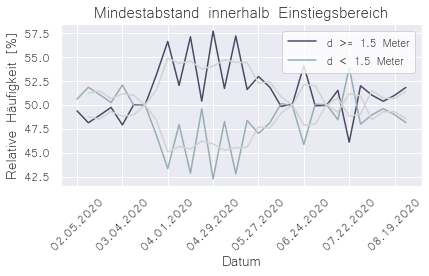

In [10]:
sb.set()
plt.ylabel("Relatie Häufigkeit [%]", fontsize = 18, fontname = "Microsoft Yi Baiti")
sb.lineplot(data = distance_df, palette = "bone", sort = False, dashes = False)
plt.xticks(distance_df.index, fontsize = 15, fontname = "Microsoft Yi Baiti", rotation = 45)
plt.xlabel("Datum", fontsize = 18, fontname = "Microsoft Yi Baiti")
plt.ylabel("Relative Häufigkeit [%]", fontsize = 18, fontname = "Microsoft Yi Baiti")
plt.yticks(fontsize = 15, fontname = "Microsoft Yi Baiti")
plt.locator_params(axis="x", nbins=8)
plt.title("Mindestabstand innerhalb Einstiegsbereich", fontsize = 20,fontname="Microsoft Yi Baiti")
sb.lineplot(distance_df.index, keep_distance_two_rolling, color = "lightgrey")
sb.lineplot(distance_df.index, keepnot_distance_two_rolling, color = "lightgrey")
plt.legend(facecolor = "white", prop={'family':"Microsoft Yi Baiti", 'size':14})

plt.tight_layout()
plt.xlabel("Datum", fontsize = 18, fontname = "Microsoft Yi Baiti")

plt.ylabel("Relative Häufigkeit [%]", fontsize = 18, fontname = "Microsoft Yi Baiti")

plt.savefig(r"Mindestabstand\Mindestabstand in Einstiegsbereich", dpi = 200)

In [11]:
distance_df

,d >= 1.5 Meter,d < 1.5 Meter
Date,,
02.05.2020,49.387398,50.612602
02.12.2020,48.142415,51.857585
02.19.2020,48.919753,51.080247
02.26.2020,49.748020,50.251980
03.04.2020,47.914521,52.085479
03.11.2020,50.029036,49.970964
03.18.2020,50.000000,50.000000
03.25.2020,53.162055,46.837945
04.01.2020,56.653226,43.346774
